<a href="https://colab.research.google.com/github/Nisarg-1406/Bank_Marketing_Using_Pyspark/blob/main/DS_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## importing requierd libraries - 

import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import log_loss
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Reading the CSV file, where delimeter is ';' and calculating the shape of the data, In this there are 45211 rows with 17 cols. 
data = pd.read_csv('bank-full.csv', sep=';')
print('Shape of our data {}'.format(data.shape))

Shape of our data (45211, 17)


In [ ]:
data.head() # To get the first 5 rows. 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.describe() # If we write this, then all the column will not be displayed. 
data.describe(include='all') # If we write this, then all the column will be displayed. 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
data.info() # To get the info of object datatype, Count of the datapoints/rows of each col, and to check wheather that col contains null or not

# Observation:
# Our dataset do not have any null/nan/missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
# To divide the data into categorical data and numerical data. And in numnerical data we are not considering the last col i.e 'y' i.e that person will take loan or not. 
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = [x for x in data.columns.to_list() if x not in categorical] # If not a categorical data then it will be the numerical data. 
numerical.remove('y')

In [ ]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

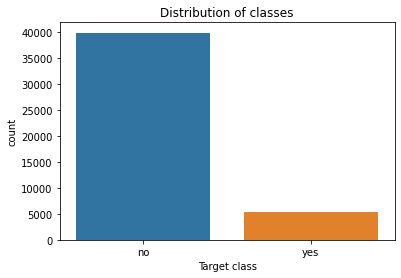

In [ ]:
# Here to get the distribution of classes of 'No' and 'Yes' for the 'Y' col using matplotlib. 

from matplotlib import pyplot as plt
sns.countplot(x=data['y'])
plt.title('Distribution of classes')
plt.xlabel('Target class') # Y label is the count by default. 

In [ ]:
data.y.value_counts() # To ge the count in the numerical format. 

# Observation: Our dataset is highly imbalanced.

no     39922
yes     5289
Name: y, dtype: int64

Text(0.5, 0, 'y: target variable')

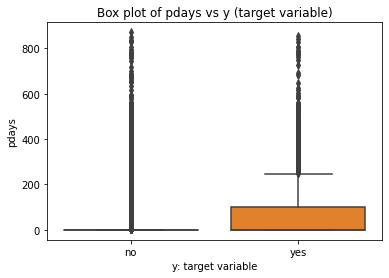

In [ ]:
## About pdays - Taken because it is creating the issue - 

# To plot the seaborn boxplot. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels 
  # of a categorical variable

sns.boxplot(y=data['pdays'], x=data['y']) # Here the box plot b/w 'pdays' and 'y'. 
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable') # Here the target variable is 'pdays'

In [ ]:
# FacetGrid - Multi-plot grid for plotting conditional relationships.
# To get entire detail explanation from this video = https://www.youtube.com/watch?v=V_a0-1lU4AU

# hue : strings - Variables that define subsets of the data, which will be drawn on separate facets in the grid.
# Size : To get the size of the plot in terms of width and height

Text(0.5, 1.0, 'PDF of pdays for target variable y')

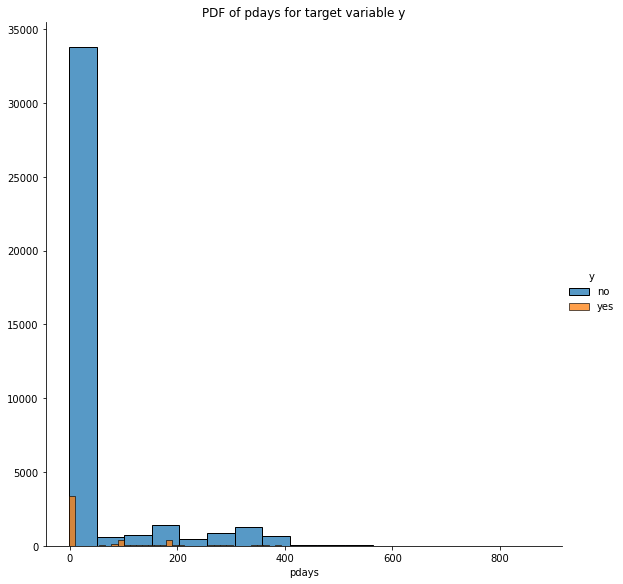

In [ ]:
sns.FacetGrid(data, hue='y', size=8) \
.map(sns.histplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

In [ ]:
data.pdays.describe() #For 'pdays to describe all the data'

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
for x in range(81, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, data.pdays.quantile(x/100)))
iqr = data.pdays.quantile(0.75) - data.pdays.quantile(0.25) # To get the inter quantile range. (75% - 25%)
print('IQR {}'.format(iqr))

81% of pdays are less than equal to -1.0
82% of pdays are less than equal to 9.0
83% of pdays are less than equal to 87.0
84% of pdays are less than equal to 93.0
85% of pdays are less than equal to 102.0
86% of pdays are less than equal to 123.0
87% of pdays are less than equal to 152.0
88% of pdays are less than equal to 173.0
89% of pdays are less than equal to 181.0
90% of pdays are less than equal to 185.0
91% of pdays are less than equal to 196.0
92% of pdays are less than equal to 239.0
93% of pdays are less than equal to 264.0
94% of pdays are less than equal to 285.0
95% of pdays are less than equal to 317.0
96% of pdays are less than equal to 337.0
97% of pdays are less than equal to 349.0
98% of pdays are less than equal to 360.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


Text(0.5, 0, 'y:target variable')

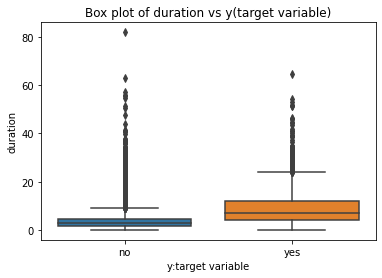

In [ ]:
## Duration - Another important criteria. 

# converting call duration from seconds to minute and plotting the seaborn boxplot against 'Y'
data['duration'] = data['duration']/60
sns.boxplot(y=data['duration'], x=data['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of duration for target variable y')

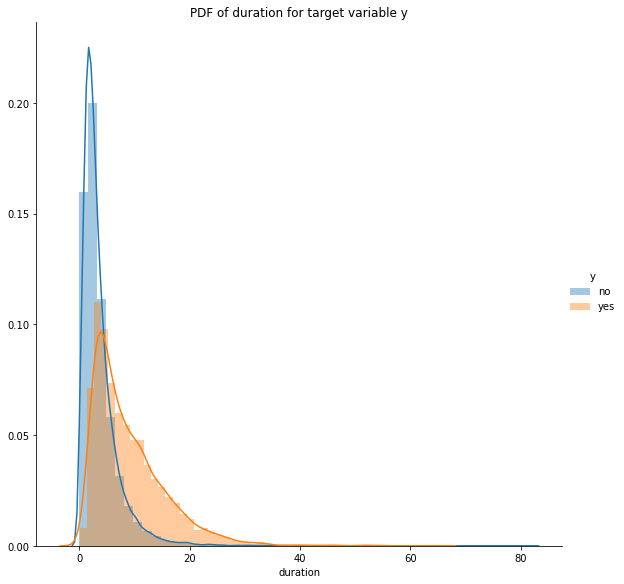

In [ ]:
# displot - Flexibly plot a univariate distribution of observations.
sns.FacetGrid(data, hue='y', size=8) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

In [ ]:
data.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [ ]:
for x in range(80, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

80% of calls have duration less than equal to 6.133333333333334
81% of calls have duration less than equal to 6.333333333333333
82% of calls have duration less than equal to 6.55
83% of calls have duration less than equal to 6.766666666666667
84% of calls have duration less than equal to 7.016666666666667
85% of calls have duration less than equal to 7.283333333333333
86% of calls have duration less than equal to 7.6
87% of calls have duration less than equal to 7.916666666666668
88% of calls have duration less than equal to 8.3
89% of calls have duration less than equal to 8.683333333333334
90% of calls have duration less than equal to 9.133333333333333
91% of calls have duration less than equal to 9.65
92% of calls have duration less than equal to 10.2
93% of calls have duration less than equal to 10.833333333333334
94% of calls have duration less than equal to 11.6
95% of calls have duration less than equal to 12.516666666666667
96% of calls have duration less than equal to 13.71666

Text(0.5, 0, 'y:target variable')

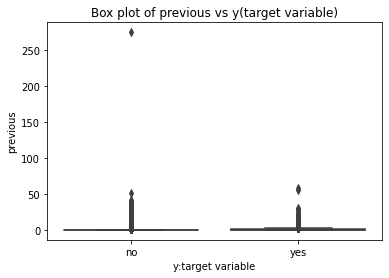

In [ ]:
## Previous - 

# For 'Previous' vs 'y'
sns.boxplot(y=data['previous'], x=data['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of previous values for target variable y')

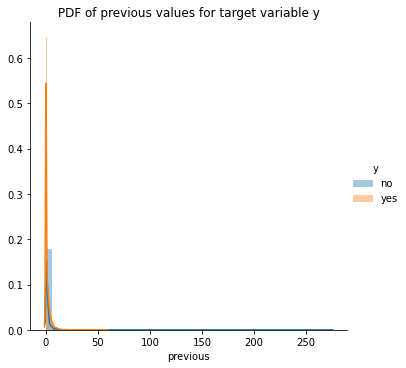

In [ ]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'previous') \
.add_legend()
plt.title('PDF of previous values for target variable y')

In [ ]:
data.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [ ]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, data.previous.quantile(x/100)))
iqr = data.previous.quantile(0.75) - data.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.900000000001455
100% of previous values less than equal to 275.0
IQR 0.0


Text(0.5, 0, 'y:target variable')

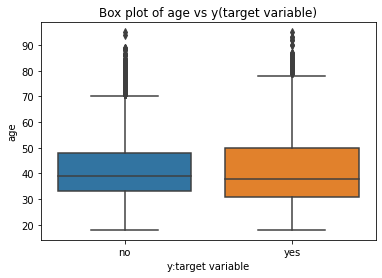

In [ ]:
## Age - 

sns.boxplot(y=data['age'], x=data['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

Text(0.5, 1.0, 'PDF of age for target variable y')

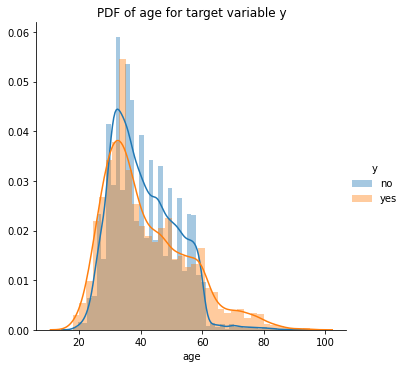

In [ ]:
sns.FacetGrid(data, hue='y', size=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

In [ ]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [ ]:
lst = [data]
for column in lst:
    # loc : Access a group of rows and columns by label(s) or a boolean array.
    column.loc[column["age"] < 30,  'age_group'] = 30 # age < 30 are categorised age_group = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40 # age >= 30 and age <= 44 are categorised age_group = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50 # age >= 45 and age <= 59 are categorised age_group = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60 # age >= 60 are categorised age_group = 60

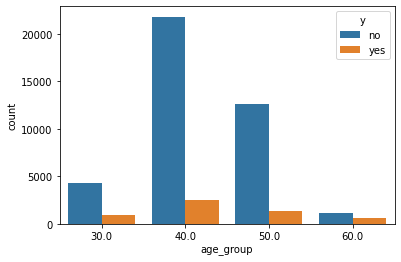

In [ ]:
sns.countplot(x='age_group', data=data, hue='y')

In [ ]:
# To get the count % of people who have 'Yes', therefore : data[data['age_group'] == 30].y.value_counts()[1], b/w different age categories

print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].y.value_counts()[1]/len(data[data['age_group'] == 30])))

print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].y.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].y.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].y.value_counts()[1]/len(data[data['age_group'] == 60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


In [ ]:
## Jobs - 

data.job.value_counts() # Count of different types of jobs

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

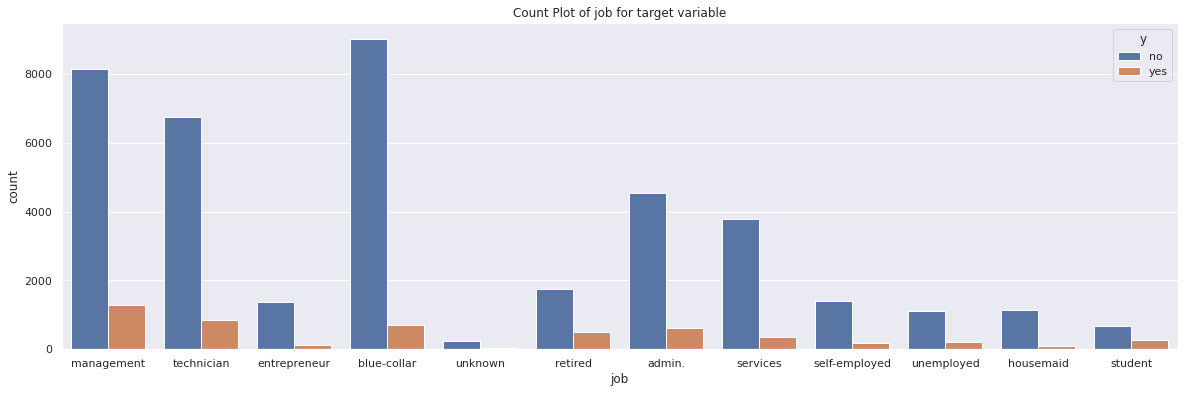

In [ ]:
sns.set(rc={'figure.figsize':(20,6)}) # To set the figure size to 20x6
sns.countplot(x=data['job'], data=data, hue=data['y']) # To use countplot - Show the counts of observations in each categorical bin using bars.
plt.title('Count Plot of job for target variable')

In [ ]:
# To get the name of job, total clients, success rate in form of table using 'PrettyTable' predefined function
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].y.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].y.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].y.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin.']), data[data['job'] == 'admin.'].y.value_counts()[1]/len(data[data['job'] == 'admin.'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].y.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].y.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].y.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].y.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].y.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].y.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].y.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].y.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


In [ ]:
## poutcome - 

data.poutcome.value_counts() # There are 4 Categories - 'unknown', 'failure', 'other', 'success'. 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

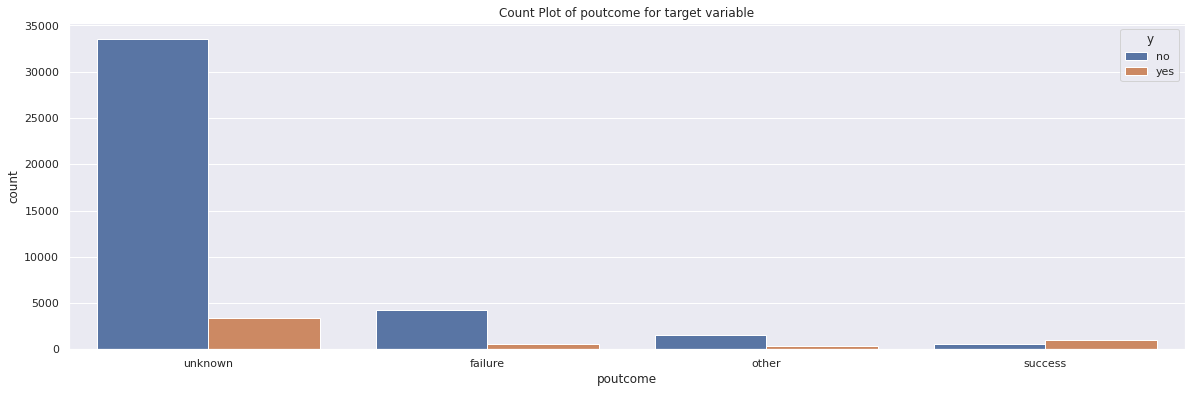

In [ ]:
sns.countplot(x=data['poutcome'], data=data, hue=data['y'])
plt.title('Count Plot of poutcome for target variable')

In [ ]:
## Education - 
data.education.value_counts() # There are 4 Categories - 'unknown', 'secondary', 'tertiary', 'primary'. 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

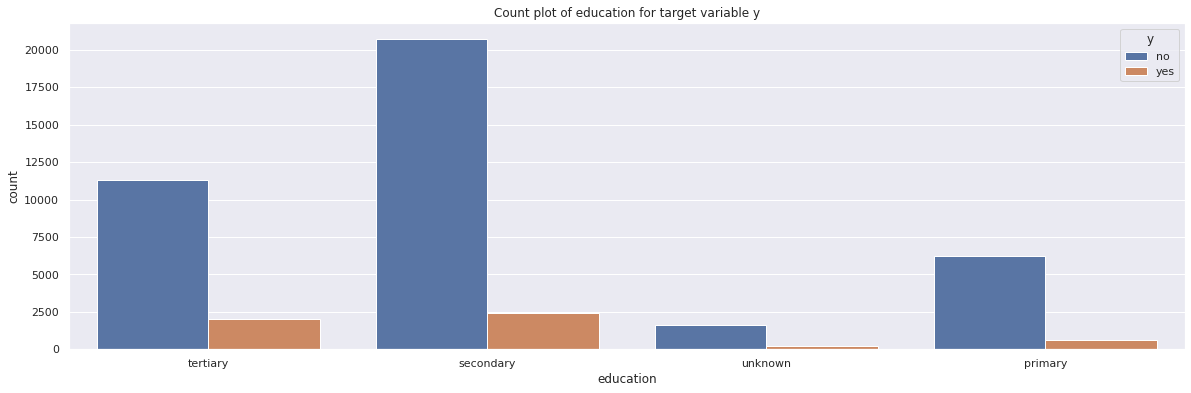

In [ ]:
sns.countplot(x=data['education'], data=data, hue=data['y'])
plt.title('Count plot of education for target variable y')

In [ ]:
## Default - 

data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable y')

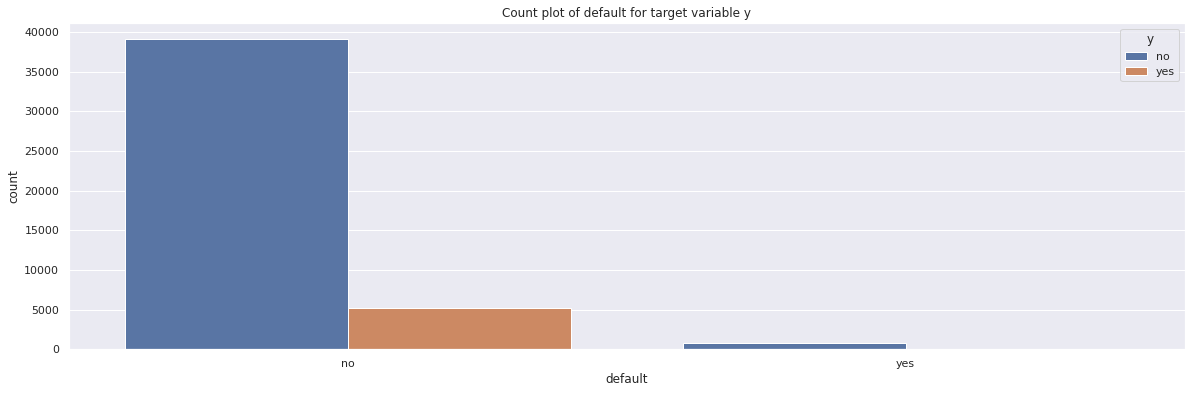

In [ ]:
sns.countplot(x=data['default'], data=data, hue=data['y'])
plt.title('Count plot of default for target variable y')

In [ ]:
data[data['default'] == 'yes'].y.count()

815

In [ ]:
## Loan - 
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

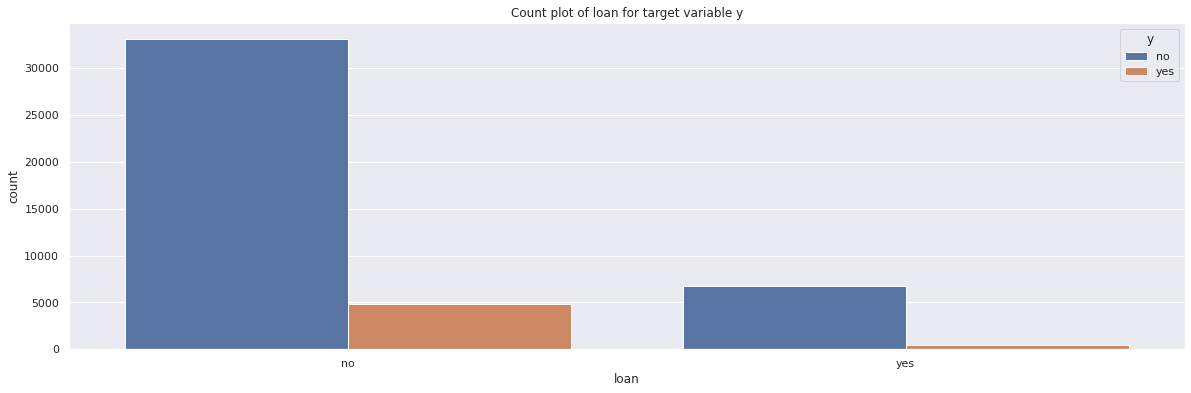

In [ ]:
sns.countplot(x=data['loan'], data=data, hue=data['y'])
plt.title('Count plot of loan for target variable y')

In [ ]:
## Contact - 

data.contact.value_counts() # Type of contacts - cellular, unknown, telephone

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable y')

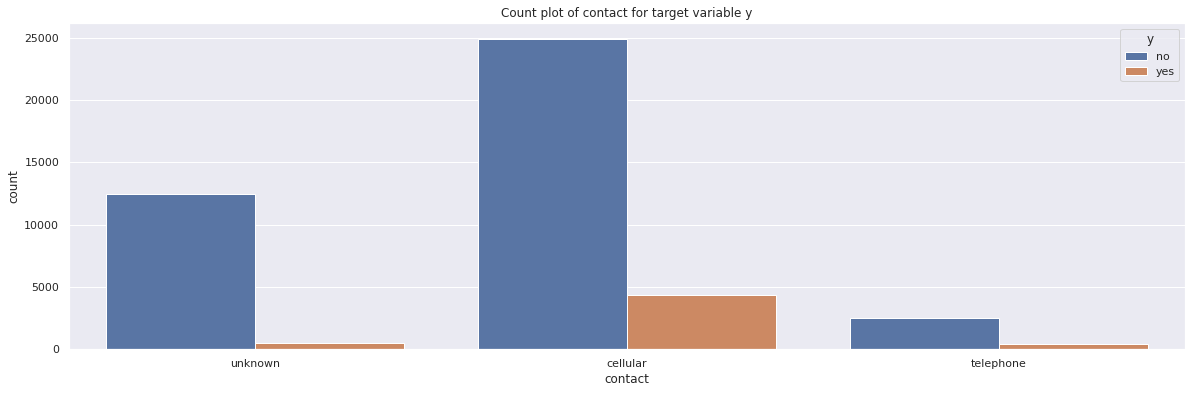

In [ ]:
sns.countplot(x=data['contact'], data=data, hue=data['y'])
plt.title('Count plot of contact for target variable y')

In [ ]:
## Month - 

data.month.value_counts() # Month value count in descending order

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable y')

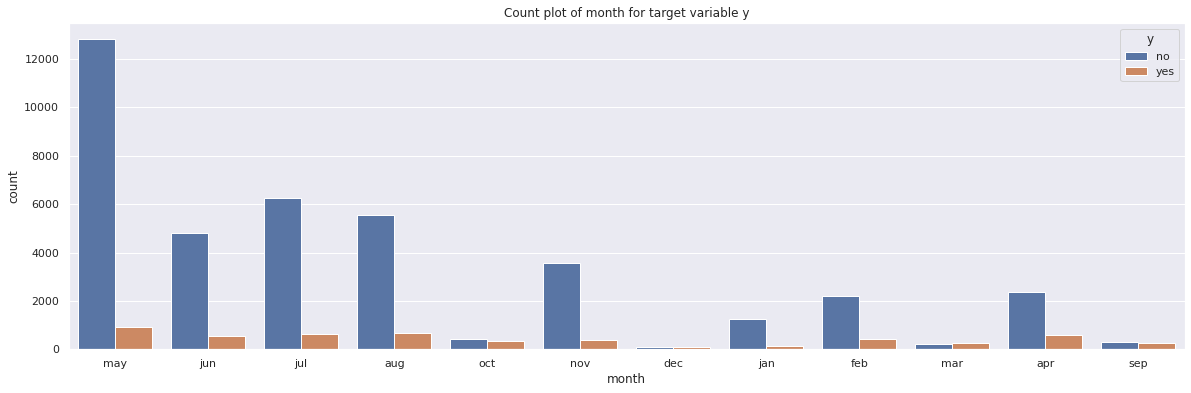

In [ ]:
sns.countplot(x=data['month'], data=data, hue=data['y'])
plt.title('Count plot of month for target variable y')

In [ ]:
data[data['month'] == 'mar'].y.value_counts()

yes    248
no     229
Name: y, dtype: int64

In [ ]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].y.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].y.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].y.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].y.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].y.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].y.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].y.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].y.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(data[data['month'] == 'sep']), data[data['month'] == 'sep'].y.value_counts()[1]/len(data[data['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].y.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].y.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].y.value_counts()[1]/len(data[data['month'] == 'dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


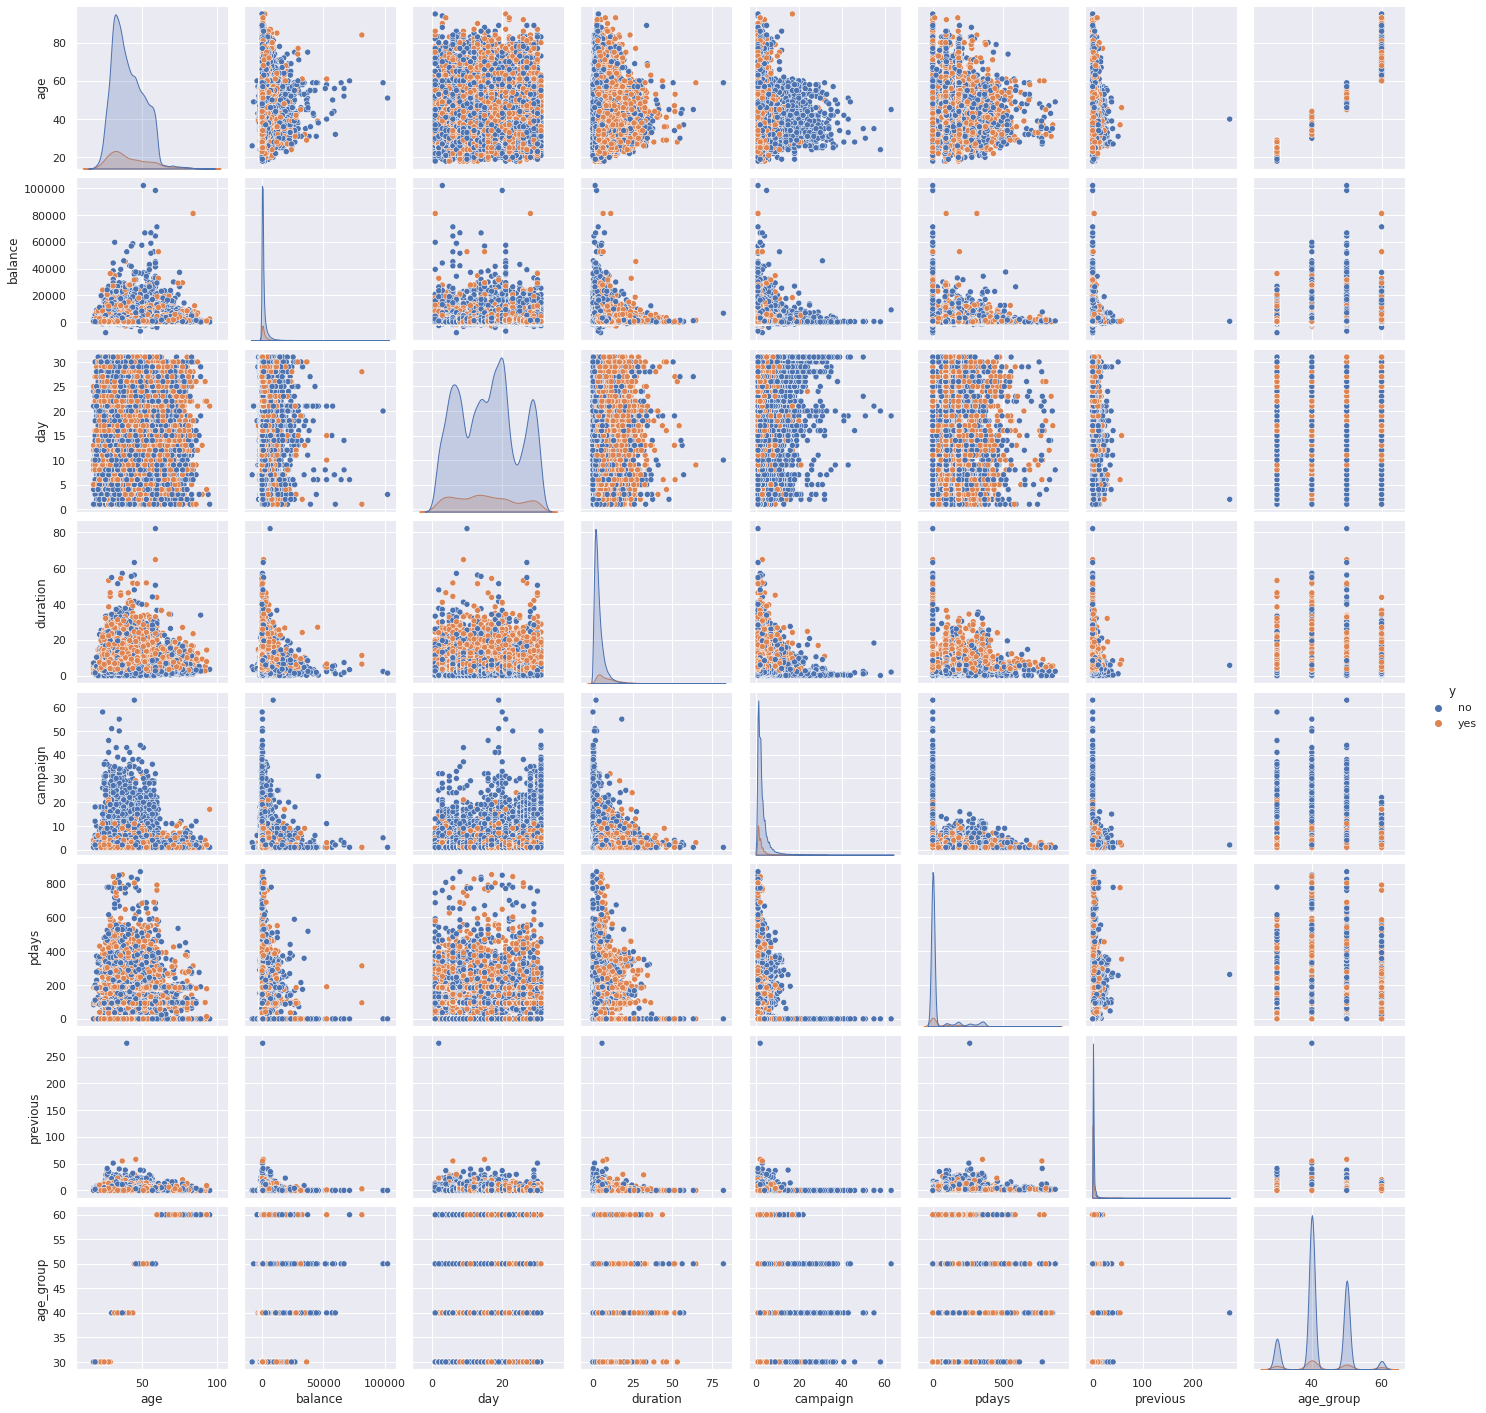

In [ ]:
## Paiplot - 

# A pairs plot allows us to see both distribution of single variables and relationships between two variables.
  # For more details do refer - https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
# sns.pairplot(data)
sns.pairplot(data, hue='y')

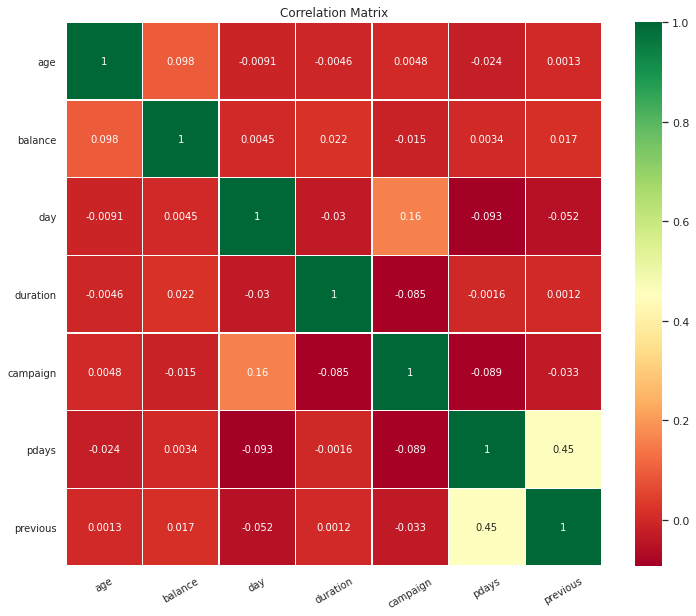

In [ ]:
## Correlation - 

corr_data = data[numerical + ['y']] # To consider all numerical data including 'Y'. 
corr = corr_data.corr() # To find the correlation among the data using corr
# plt.close()

# HeatMap - Plot rectangular data as a color-encoded matrix.
# annot = If True, write the data value in each cell. Basically, an array of same shape as data which is used to annotate the heatmap. 
# cmap='RdYlGn' = To choose the color. Here using Red(Rd), Yellow (Yl), Green (Gn)
# linewidths = Width of the lines that will divide each cell.
# aanot_kws = aanot_kws in Seaborn serves a different purpose, namely, it provides access to how annotations are displayed, rather than what is displayed. In this case font of annotation (letter)
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})

fig=plt.gcf() # Get the current figure. If no current figure exists, a new one is created using figure().
fig.set_size_inches(12,10) # Size of the heatmap in terms of width and height 
plt.xticks(fontsize=10,rotation=30) # fontsize of all columns rotated by 30 degree
plt.yticks(fontsize=10) # fontsize of all columns
plt.title('Correlation Matrix')
plt.show()

In [ ]:
## creating new data frame of numerical columns 

data_numerical = data[numerical] 
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 7)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,4.350000,1,-1,0
1,44,29,5,2.516667,1,-1,0
2,33,2,5,1.266667,1,-1,0
3,47,1506,5,1.533333,1,-1,0
4,33,1,5,3.300000,1,-1,0


In [ ]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration       3.6
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [ ]:
data_out = data[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data_out.shape[0]))

17029 points are outliers based on IQR


In [ ]:
## Preprocessing - Train and Test split - 

data.replace(to_replace={'y':'yes'}, value=1, inplace=True) # This will replace the 'yes' in 'y' with value = 1
data.replace(to_replace={'y':'no'}, value=0, inplace=True) # This will replace the 'no' in 'y' with value = 0

In [ ]:
# Convert the columns into categorical variables i.e to convert it to index format
data1 = data.copy()
data1['job'] = data1['job'].astype('category').cat.codes
# print(data1['job'])
data1['marital'] = data1['marital'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['contact'] = data1['contact'].astype('category').cat.codes
data1['poutcome'] = data1['poutcome'].astype('category').cat.codes
data1['month'] = data1['month'].astype('category').cat.codes
# print(data1['month'])
data1['default'] = data1['default'].astype('category').cat.codes
data1['loan'] = data1['loan'].astype('category').cat.codes
data1['housing'] = data1['housing'].astype('category').cat.codes

In [ ]:
y = data['y']
x_train, x_test, y_train, y_test = train_test_split(data.drop(['y'], axis=1), y, test_size=0.20, random_state=42) # In general format by default random_state is taken as 42

In [ ]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (36168, 17) (36168,)
Test data shape (9043, 17) (9043,)


In [ ]:
## Encoding Data - 

# Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It is arranged in increasing order in alphabatical order. 
 # If the particular word is appearing 'n' times then count in the vector for that word is 'n'. For more details and code,  refer this - https://www.educative.io/edpresso/countvectorizer-in-python

vectorizer = CountVectorizer(vocabulary=x_train.poutcome.unique()) # To get unique values for poutcome and set for training. 

# One such method is fit_transform() and another one is transform(). Both are the methods of class sklearn.preprocessing.StandardScaler() and used almost together while scaling or
  # standardizing our training and test data. The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the
  # features using the respective mean and variance. 
  # About more differences like why fit_tansform for train and why only transform for test, refer this (IMP) - https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

x_train_poutcome = vectorizer.fit_transform(x_train.poutcome)
x_test_poutcome = vectorizer.transform(x_test.poutcome)

In [ ]:
# Above same concept for 'contact' column
vectorizer = CountVectorizer(vocabulary=x_train.contact.unique())
x_train_contact = vectorizer.fit_transform(x_train.contact)
x_test_contact = vectorizer.transform(x_test.contact)

In [ ]:
# Above same concept for 'unique' column
vectorizer = CountVectorizer(vocabulary=x_train.month.unique())
x_train_month = vectorizer.fit_transform(x_train.month)
x_test_month = vectorizer.transform(x_test.month)

In [ ]:
# Above same concept for 'housing' column
vectorizer = CountVectorizer(vocabulary=x_train.housing.unique())
x_train_housing = vectorizer.fit_transform(x_train.housing)
x_test_housing = vectorizer.transform(x_test.housing)

In [ ]:
## Encoding Numerical data using Normalizer()

vectorizer = Normalizer()
# reshape - The criterion to satisfy for providing the new shape is that 'The new shape should be compatible with the original shape'. 
 # numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)). It simply means that it is an unknown dimension and we want numpy to figure it out.
  # And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria
  # Reshape your data using array.reshape(1, -1) if it contains a single sample (single row)
  # Reshape your data using array.reshape(-1, 1) if your data has a single feature (single col)
  # For more eg, refer this : https://stackoverflow.com/a/42510505/12228364
# Transpose is done for changing rows to columns

x_train_duration = vectorizer.fit_transform(x_train.duration.values.reshape(1,-1)).transpose()
x_test_duration = vectorizer.transform(x_test.duration.values.reshape(1, -1)).transpose()

In [ ]:
# Same above concept for 'pdays'
vectorizer = Normalizer()
x_train_pdays = vectorizer.fit_transform(x_train.pdays.values.reshape(1,-1)).transpose()
x_test_pdays = vectorizer.transform(x_test.pdays.values.reshape(1, -1)).transpose()

In [ ]:
# Same above concept for 'age'
vectorizer = Normalizer()
x_train_age = vectorizer.fit_transform(x_train.age.values.reshape(1,-1)).transpose()
x_test_age = vectorizer.transform(x_test.age.values.reshape(1, -1)).transpose()

In [ ]:
# Same above concept for 'balance'
vectorizer = Normalizer()
x_train_balance = vectorizer.fit_transform(x_train.balance.values.reshape(1,-1)).transpose()
x_test_balance = vectorizer.transform(x_test.balance.values.reshape(1, -1)).transpose()

In [ ]:
from scipy.sparse import hstack

train = hstack((x_train_contact, x_train_poutcome, x_train_month, x_train_housing, x_train_duration, x_train_pdays, x_train_age, x_train_balance)).tocsr()

test = hstack((x_test_contact, x_test_poutcome, x_test_month, x_test_housing, x_test_duration, x_test_pdays, x_test_age, x_test_balance)).tocsr()

In [ ]:
## Machine Learning Models - 

# dictionary to store accuracy and roc score for each model
score = {}

In [ ]:
## Logistic Regression

parameters = {'C':[(10**i)*x for i in range(-4, 1) for x in [1,3,5]]}

# class_weight='balanced' - it basically means replicating the smaller class until you have as many samples as in the larger one, but in an implicit way.
model = LogisticRegression(class_weight='balanced')

# Hyperparameters - When a model is being trained on a data set, it determines the best parameters for each predictor variable. Hyperparameters on the other hand are parameters that are
 # independent of the training process. The model that performs the best on the test set will be deemed to have the best hyperparameters. This is done using cross validation.
# Grid Search and Random Search - Grid search is where you pick x number of values that are evenly spaced along each axis (similar to our introductory example). This forms a grid — hence the name. 
 # Random search is when x-squared number of values are picked randomly. Both cases generate x-squared number of points. 
 # For more details , refer this - https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35

# GridSearchCV - It is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. 
# RandomizedSearchCV - It is very useful when we have many parameters to try and the training time is very long. 
 # cv - integer or cross-validation generator
 # njobs - Number of CPU cores used during the cross-validation loop
clf = RandomizedSearchCV(model, parameters, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'C': 1}
Best score: 0.8076672061324874


In [ ]:
## Training Logistic Regression with output hyperparameters -  

from sklearn.metrics import log_loss

# Regularization is applying a penalty to increase the magnitude of parameter values in order to reduce overfitting.
  # C : Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
model = LogisticRegression(C=3, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)

# predict_proba - Probability estimates, The returned estimates for all classes are ordered by the label of classes.
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

In [ ]:
# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
# ROC - AUC --- Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

**************************************************
Train AUC: 0.859
Test AUC: 0.887
**************************************************
Train Accuracy: 0.833
Test Accuracy: 0.746


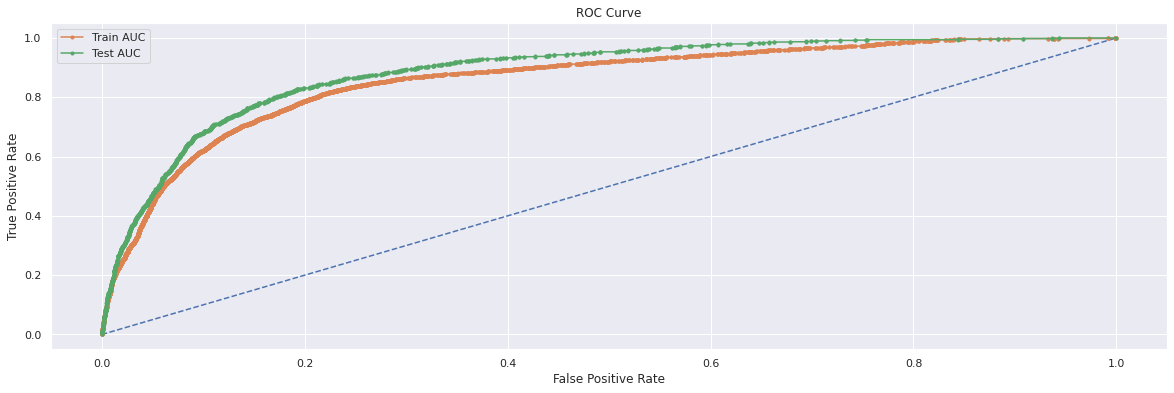

In [ ]:
score['Logistic Regression'] = [test_auc, test_acc]

# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--') # x = [0,1] & y = [0,1] and linestyle is '--'.
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
## Train Confusion Matrix - 

# Confusion matix - A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual
 # target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.
#  For more details - https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[27113  4857]
 [ 1172  3026]]


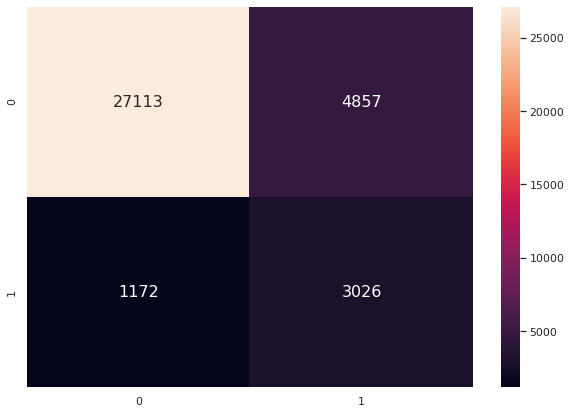

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))

# fmt - The fmt field is added in order to prevent formatting being applied to the manual label, otherwise it would be in format of 10^x. 
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='d')

Confusion matrix:
 [[5786 2166]
 [ 135  956]]


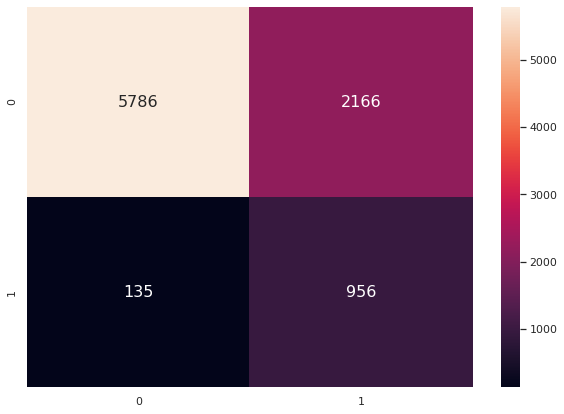

In [ ]:
## Test Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='d')

In [ ]:
## Random Forest - 

# n_estimators - This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower.
# max_depth - Dpeth of the particular tree
# n_jobs - This parameter tells the engine how many processors is it allowed to use. A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.
# param_distributions - Dictionary with parameters names (str) as keys and distributions or lists of parameters to try. 
params = {'n_estimators':[75, 100, 250, 500], 'max_depth':[3, 5, 10, 15, 25]}
model = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 500, 'max_depth': 10}
Best score: 0.9185258783992876


In [ ]:
## Training random forest with output hyperparameters - 

model = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Random Forest'] = [test_auc, test_acc]

**************************************************
Train AUC: 1.000
Test AUC: 0.794
**************************************************
Train Accuracy: 0.999
Test Accuracy: 0.813


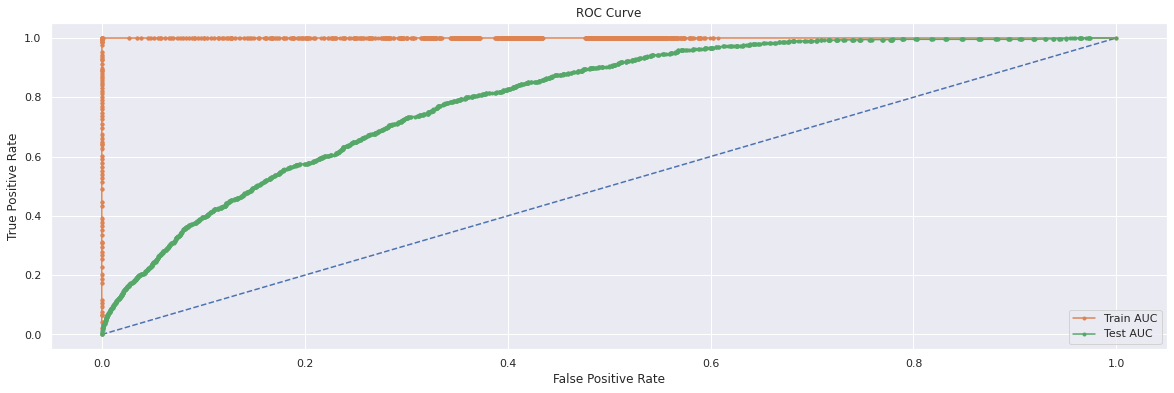

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [ ]:
## Train Confusion Matrix -

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[31938    32]
 [    0  4198]]


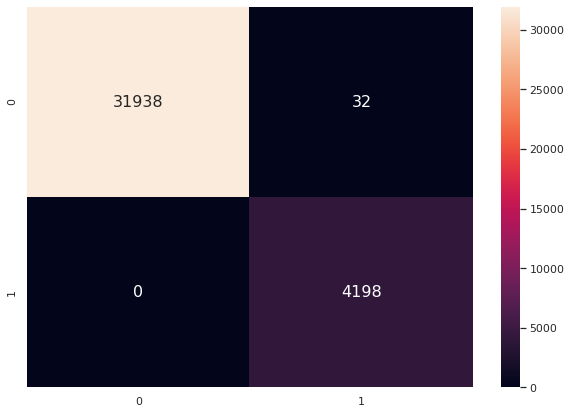

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2)) # 2 rows and 2 columns
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Test Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[6829 1123]
 [ 572  519]]


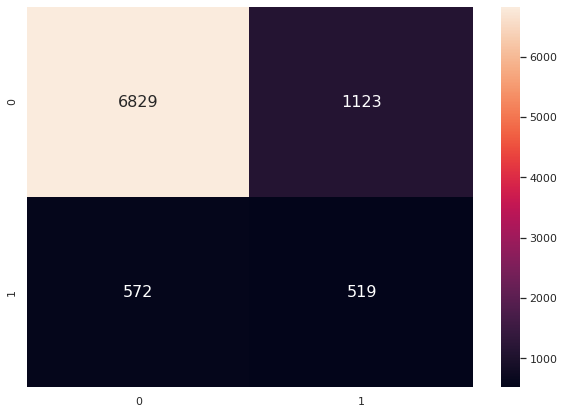

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Support vector machine (SVM)

# Lagrangian multiplier, usually denoted by α is a vector of the weights of all the training points as support vectors.
# Suppose there are m training examples. Then α is a vector of size m. Now focus on any ith element of α: αi. It is clear that αi captures the weight of the ith training example as a support vector. 
 #  Higher value of αi means that ith training example holds more importance as a support vector; something like if a prediction is to be made, then that ith training example will be more important 
 #  in deriving the decision.
# why particularly the Lagrangian multiplier is greater than zero for support vectors.
 #   It is just a construct. When you say αi=0, it is just that ith training example has zero weight as a support vector. You can instead also say that that ith example is not a support vector.
# alpha - best parameter - 0.0001
params = {'alpha': [10**i for i in range(-4, 5)]}

model = SGDClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'alpha': 0.0001}
Best score: 0.7795911435999003


In [ ]:
## Training SVM with output hyperparameters - 

# decision_function - Decision function is a method present in classifier{ SVC, Logistic Regression } class of sklearn machine learning framework. This method basically returns a Numpy array,
 # In which each element represents whether a predicted sample for x_test by the classifier lies to the right or left side of the Hyperplane and also how far from the HyperPlane.
 # It also tells us that how confidently each value predicted for x_test by the classifier is Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value).

model = SGDClassifier(alpha=0.0001, class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.decision_function(train)
y_probs_test = model.decision_function(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

In [ ]:
# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['SVM'] = [test_auc, test_acc]

**************************************************
Train AUC: 0.783
Test AUC: 0.801
**************************************************
Train Accuracy: 0.805
Test Accuracy: 0.802


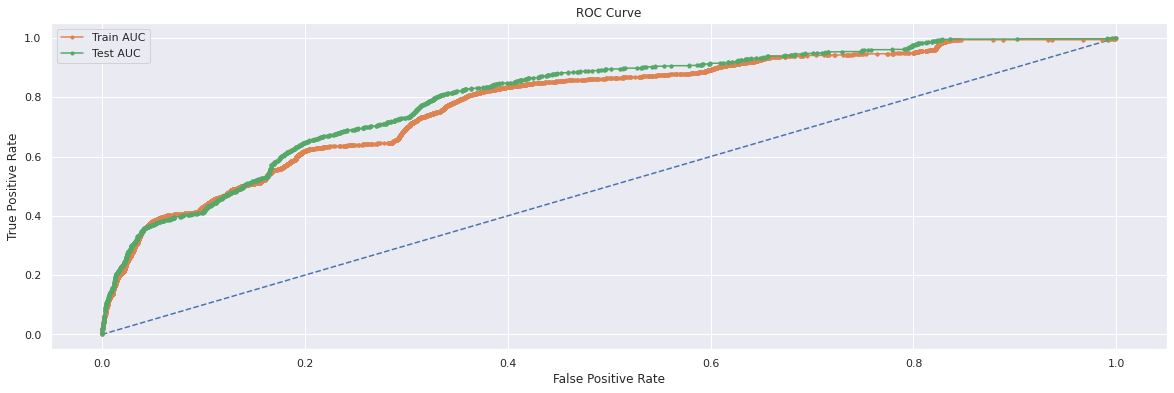

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [ ]:
## Train Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[26958  5012]
 [ 2032  2166]]


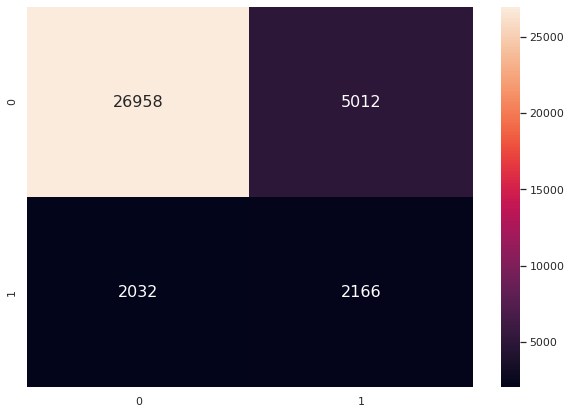

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Test Confusion Matrix-

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[6678 1274]
 [ 514  577]]


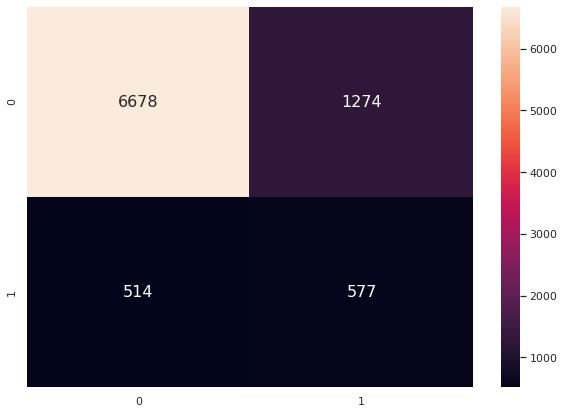

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## XGBoost - 

# XGBoost - Extreme Gradient Boosting (Full form)
# XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) 
  # artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are 
  # considered best-in-class right now. 

  # It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.
  # It is optimized gradient boosting algorithm through parallel processing, tree pruning, handeling missing values and regularization to avoid overfitting. 
  # For more details refer - https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d#:~:text=What%20is%20XGBoost%3F,all%20other%20algorithms%20or%20frameworks.

  # n_estimators - Tune The Number of Trees in XGBoost 
from xgboost import XGBClassifier

params = {'max_depth': [5, 10, 15], 'n_estimators': [10, 100, 500]}

model = XGBClassifier(class_weight='balanced', n_jobs=-1)
clf = RandomizedSearchCV(model, param_distributions=params, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1, return_train_score=True)
clf.fit(train, y_train)
print('Best parameters:  {}'.format(clf.best_params_))
print('Best score: {}'.format(clf.best_score_))

Best parameters:  {'n_estimators': 100, 'max_depth': 5}
Best score: 0.9245949882947082


In [ ]:
## Training XGBClassifier with output hyperparameters - 

from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1)
model.fit(train, y_train)
y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['XGBoost'] = [test_auc, test_acc]

**************************************************
Train AUC: 0.942
Test AUC: 0.854
**************************************************
Train Accuracy: 0.920
Test Accuracy: 0.785


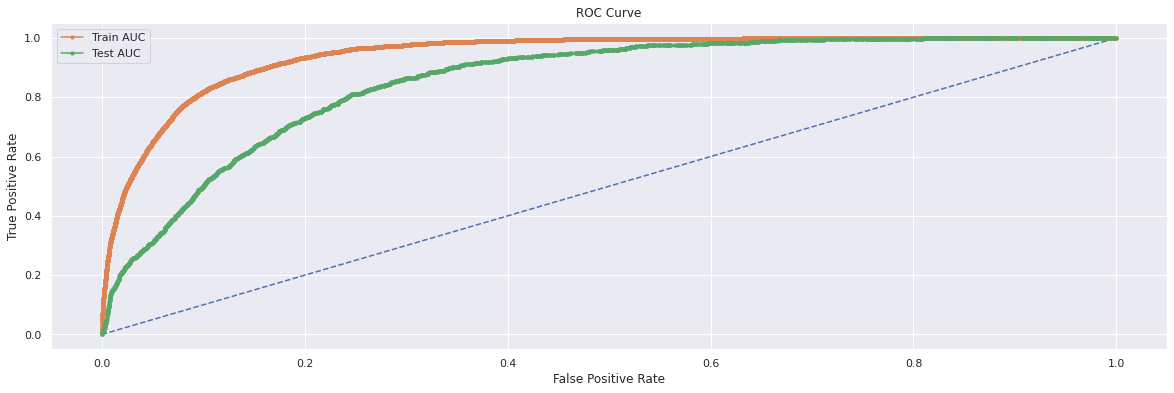

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
## Train Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[31231   739]
 [ 2151  2047]]


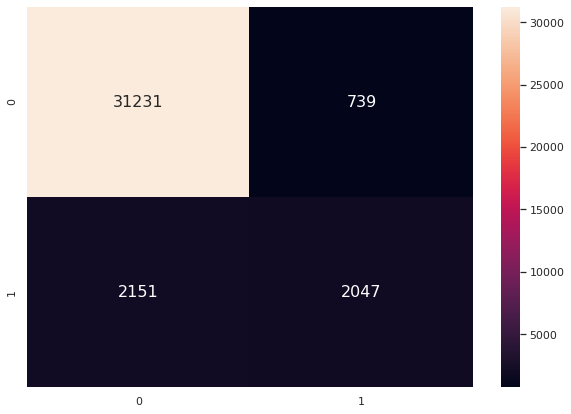

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Test Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[6284 1668]
 [ 275  816]]


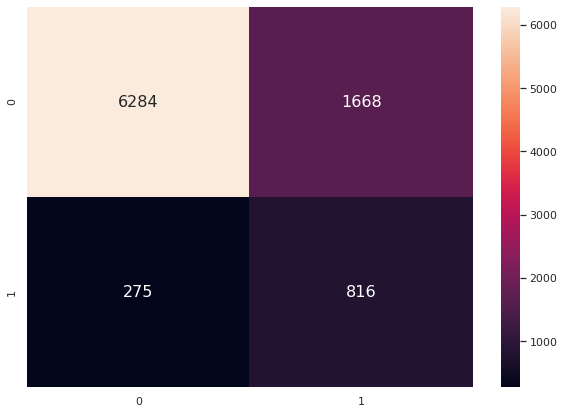

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Stacking Classifier - 

# Stacking Classifier - The simplest form of stacking can be described as an ensemble learning technique where the predictions of multiple classifiers (referred as level-one classifiers)
 # are used as new features to train a meta-classifier. 
# To prevent information from leaking into the training from the target (the thing you’re trying to predict), the following rule should be followed when stacking classifiers:- The level
  # one predictions should come from a subset of the training data that was not used to train the level one classifiers. For this follow first image in the link and also for more info follow 
  # the link - https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840

# CalibratedClassifierCV - Probability calibration with isotonic regression or logistic regression. The method to use for calibration. Can be 'sigmoid' which corresponds to Platt's method
 # (i.e. a logistic regression model) or ‘isotonic’ which is a non-parametric approach. It is not advised to use isotonic calibration with too few calibration samples (<<1000) since it
 # tends to overfit.

# Sigmoid function - All sigmoid functions have the property that they map the entire number line into a small range such as between 0 and 1, or -1 and 1, so one use of a sigmoid function 
 # is to convert a real value into one that can be interpreted as a probability.

from sklearn.calibration import CalibratedClassifierCV
from mlxtend.classifier import StackingClassifier

In [ ]:
model_1 = LogisticRegression(C=3, class_weight='balanced', n_jobs=-1)
model_1.fit(train, y_train)
clf_1 = CalibratedClassifierCV(model_1, method='sigmoid')

model_2 = RandomForestClassifier(n_estimators=250, max_depth=25, class_weight='balanced', n_jobs=-1)
model_2.fit(train, y_train)
clf_2 = CalibratedClassifierCV(model_2, method='sigmoid')

model_3 = SGDClassifier(alpha=0.0001, class_weight='balanced', n_jobs=-1)
model_3.fit(train, y_train)
clf_3 = CalibratedClassifierCV(model_3, method='sigmoid')

model_4 = XGBClassifier(max_depth=5, n_estimators=100 ,class_weight='balanced', n_jobs=-1)
model_4.fit(train, y_train)
clf_4 = CalibratedClassifierCV(model_4, method='sigmoid')

In [ ]:
C = [0.0001,0.001,0.01,0.1,1,10] # It is the regulaization parameter weight. 
# An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
  # True Positive Rate and False Positive Rate
roc = 0
best_C = 0 # To get the best value of C. 
for i in C:
    log_reg = LogisticRegression(C=i, n_jobs=-1)
    # meta_classifier - Meta-learning in machine learning most commonly refers to machine learning algorithms that learn from the output of other machine learning algorithms. So meta-learning
     # algorithms make predictions by taking the output from existing machine learning algorithms as input and predicting a number or class label.
     # Meta-Classifier: Meta-learning algorithm for classification predictive modeling tasks. For more details - https://machinelearningmastery.com/meta-learning-in-machine-learning/
    model = StackingClassifier(classifiers=[clf_1, clf_2, clf_3, clf_4], meta_classifier=log_reg, use_probas=True)
    model.fit(train, y_train)
    model_roc = roc_auc_score(y_test, model.predict_proba(test)[:, 1]) # keep probabilities for the positive outcome only, therefore to write [:,1]. 
    if roc < model_roc: # If we get the model_roc > roc then to update the roc and best_C as i 
        roc = model_roc
        best_C = i

In [ ]:
best_C 

0.0001

In [ ]:
## Training stacking classifier with output hyperparameter - 

from mlxtend.classifier import StackingClassifier

log_reg = LogisticRegression(C=0.0001, n_jobs=-1)
stack_clf = StackingClassifier(classifiers=[clf_1, clf_2, clf_3, clf_4], meta_classifier=log_reg, use_probas=True)
stack_clf.fit(train, y_train)

y_probs_train = stack_clf.predict_proba(train)
y_probs_test = stack_clf.predict_proba(test)
y_predicted_train = stack_clf.predict(train)
y_predicted_test = stack_clf.predict(test)

In [ ]:
# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Stacking Classifier'] = [test_auc, test_acc]

**************************************************
Train AUC: 0.993
Test AUC: 0.864
**************************************************
Train Accuracy: 0.884
Test Accuracy: 0.879


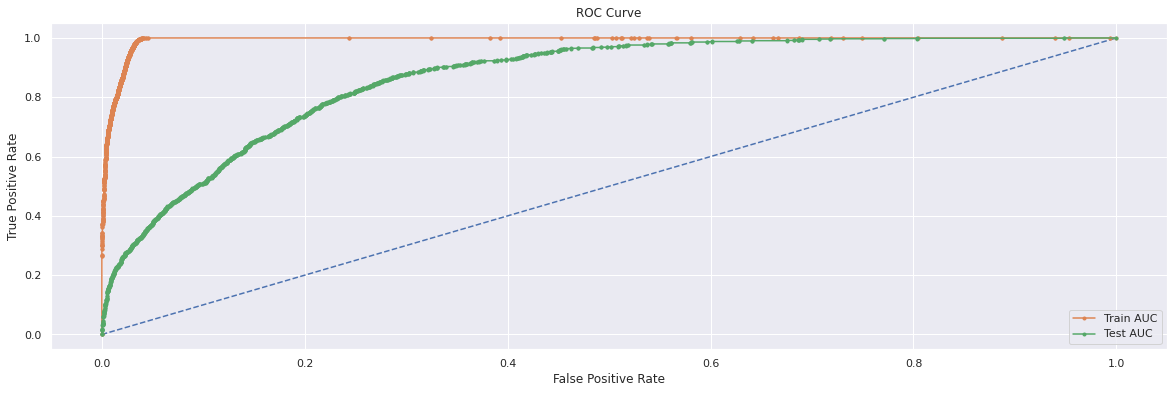

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the stack_clf
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
## Train Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[31970     0]
 [ 4198     0]]


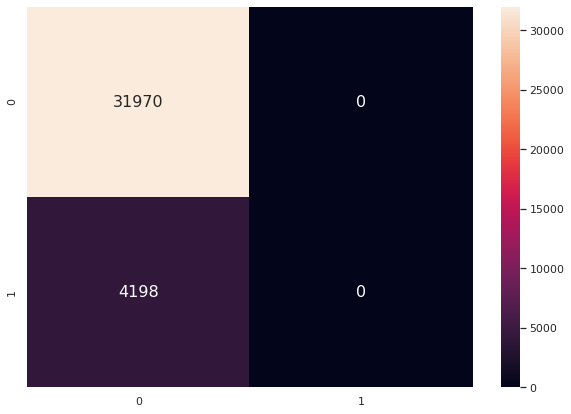

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Test Confusion Matrix
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[7952    0]
 [1091    0]]


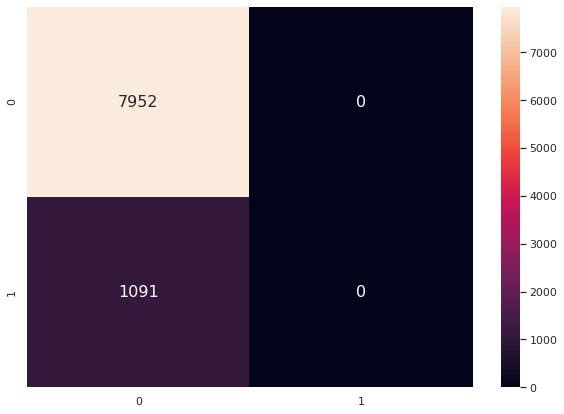

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Voting Classifier - 

# Esemble - A collection of several models working together on a single set is called an ensemble. The method is called Ensemble Learning. Why ensembles? - Lower error, Less over-fitting.
# Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different
 # ones that are trained. We can train data set using different algorithms and ensemble then to predict the final output. The final output on a prediction is taken by majority vote 
  # according to two different strategies : 1) Hard voting / Majority voting, 2) Soft voting. For more details - https://medium.com/@sanchitamangale12/voting-classifier-1be10db6d7a5

from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('log_reg', clf_1), ('rf', model_2), ('stack', stack_clf), ('xgb', model_4), ('log_reg_1', model_1)], voting='soft')
model.fit(train, y_train)

y_probs_train = model.predict_proba(train)
y_probs_test = model.predict_proba(test)
y_predicted_train = model.predict(train)
y_predicted_test = model.predict(test)

In [ ]:
# keep probabilities for the positive outcome only
y_probs_train = y_probs_train[:, 1]
y_probs_test = y_probs_test[:, 1]

In [ ]:
# calculate AUC and Accuracy
train_auc = roc_auc_score(y_train, y_probs_train)
test_auc = roc_auc_score(y_test, y_probs_test)
train_acc = accuracy_score(y_train, y_predicted_train)
test_acc = accuracy_score(y_test, y_predicted_test)
print('*'*50)
print('Train AUC: %.3f' % train_auc)
print('Test AUC: %.3f' % test_auc)
print('*'*50)
print('Train Accuracy: %.3f' % train_acc)
print('Test Accuracy: %.3f' % test_acc)

score['Voting Classifier'] = [test_auc, test_acc]

**************************************************
Train AUC: 0.977
Test AUC: 0.894
**************************************************
Train Accuracy: 0.925
Test Accuracy: 0.898


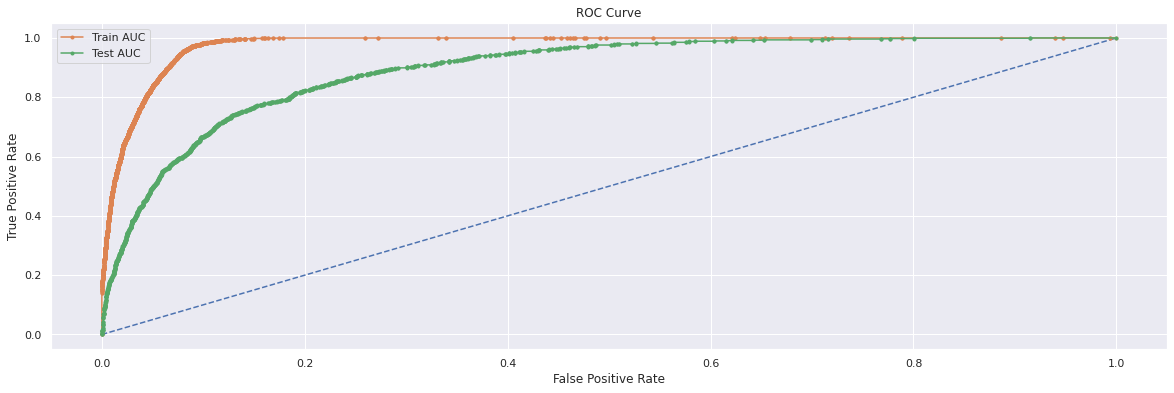

In [ ]:
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_probs_train)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, marker='.', label='Train AUC')
plt.plot(test_fpr, test_tpr, marker='.', label='Test AUC')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
## Train Confusion Matrix - 

from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_train, y_predicted_train)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[31728   242]
 [ 2482  1716]]


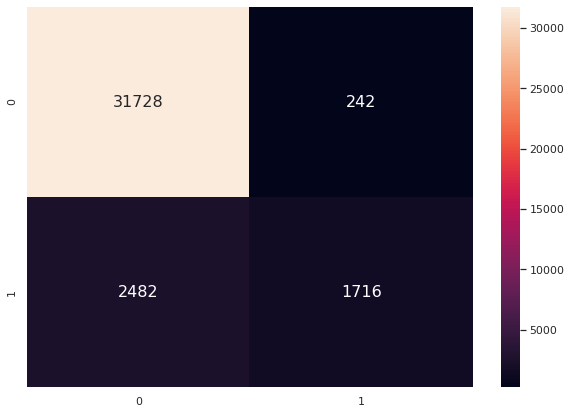

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Test Confusion Matrix -
from sklearn.metrics import confusion_matrix

cma = confusion_matrix(y_test, y_predicted_test)
print('Confusion matrix:\n', cma)

Confusion matrix:
 [[7670  282]
 [ 640  451]]


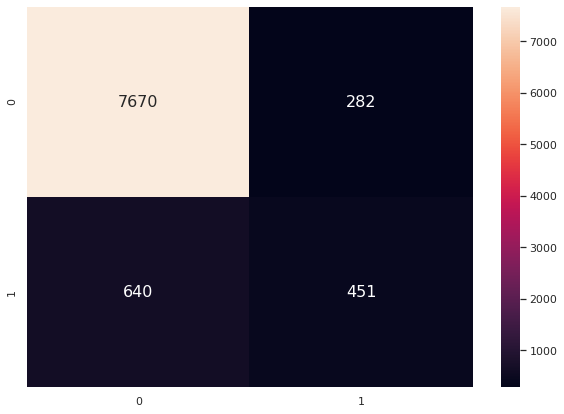

In [ ]:
df_cm = pd.DataFrame(cma, range(2), columns=range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

In [ ]:
## Overall Results - 
print('***************  Comparison of different models  ****************')
table = PrettyTable(['Model', 'Test AUC', 'Test Accuracy'])
for item in score.items():
    table.add_row([item[0], item[1][0], item[1][1]])
print(table)

***************  Comparison of different models  ****************
+---------------------+--------------------+--------------------+
|        Model        |      Test AUC      |   Test Accuracy    |
+---------------------+--------------------+--------------------+
|       XGBoost       | 0.853617292665249  | 0.7851376755501492 |
| Stacking Classifier | 0.8637562081932475 | 0.8793541966161672 |
|  Voting Classifier  | 0.8936204301888323 | 0.8980426849496849 |
| Logistic Regression | 0.8868714117887895 | 0.7455490434590291 |
|    Random Forest    | 0.7942039265842534 | 0.8125622028088024 |
|         SVM         | 0.8010343223410121 | 0.8022780050868075 |
+---------------------+--------------------+--------------------+
